In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
IMG_HEIGHT=224 
IMG_WIDTH = 224
batch_size=32

In [3]:
train_data_dir='../input/fer2013/train/'
validation_data_dir='../input/fer2013/test/'

In [4]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

In [5]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='rgb',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='rgb',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [8]:
img, label = train_generator.__next__()

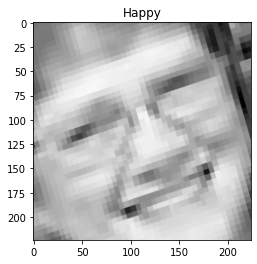

In [9]:
import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image, cmap='gray')
plt.title(labl)
plt.show()

In [10]:
import tensorflow_hub as hub
feature_extractor_model = "https://tfhub.dev/google/imagenet/mobilenet_v2_075_224/classification/5"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

2022-06-17 10:52:52.787474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 10:52:52.938296: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 10:52:52.939460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 10:52:52.941089: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [11]:
model = Sequential([
#  data_augmentation,
  pretrained_model_without_top_layer,
  Dense(7,activation='softmax')
])

In [12]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              2664345   
_________________________________________________________________
dense (Dense)                (None, 7)                 7014      
Total params: 2,671,359
Trainable params: 7,014
Non-trainable params: 2,664,345
_________________________________________________________________
None


In [13]:
train_path = "../input/fer2013/train/"
test_path = "../input/fer2013/test"

In [14]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [15]:
epochs=100

In [16]:
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)

2022-06-17 10:53:06.462456: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-06-17 10:53:12.035303: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


897/897 [==============================] - 518s 566ms/step - loss: 1.7482 - accuracy: 0.3350 - val_loss: 1.6422 - val_accuracy: 0.3637
Epoch 2/100
897/897 [==============================] - 361s 402ms/step - loss: 1.6555 - accuracy: 0.3693 - val_loss: 1.5606 - val_accuracy: 0.3972
Epoch 3/100
897/897 [==============================] - 361s 403ms/step - loss: 1.6282 - accuracy: 0.3808 - val_loss: 1.5918 - val_accuracy: 0.3883
Epoch 4/100
897/897 [==============================] - 367s 409ms/step - loss: 1.6250 - accuracy: 0.3830 - val_loss: 1.6688 - val_accuracy: 0.3528
Epoch 5/100
897/897 [==============================] - 364s 406ms/step - loss: 1.6162 - accuracy: 0.3823 - val_loss: 1.5874 - val_accuracy: 0.3877
Epoch 6/100
897/897 [==============================] - 362s 404ms/step - loss: 1.6070 - accuracy: 0.3902 - val_loss: 1.5986 - val_accuracy: 0.3742
Epoch 7/100
897/897 [==============================] - 360s 401ms/step - loss: 1.6021 - accuracy: 0.3903 - val_loss: 1.5781 - val_

In [17]:
model.save('emotion_detection_model.h5')

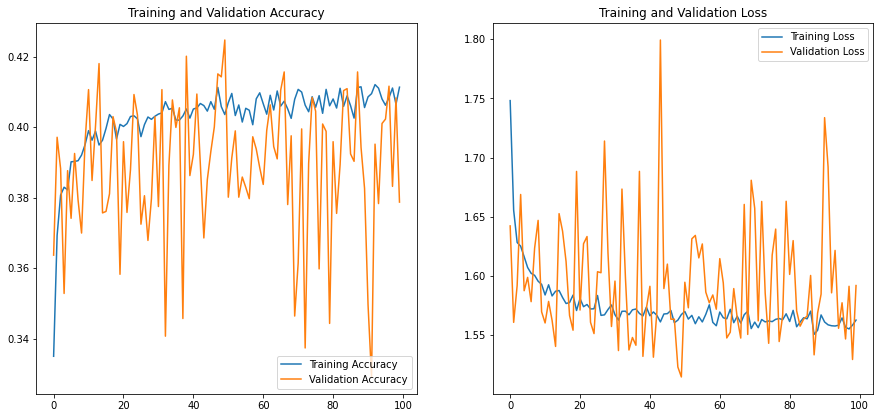

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
